In [1]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
training_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range= 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split =  0.2
)

In [4]:
train_dir = r'F:\Image_dataset\Dataset1\Train'

In [5]:
train_generator  = training_generator.flow_from_directory(
    train_dir,
    target_size  = (100,100),
    batch_size  = 16,
    class_mode  = 'binary',
    subset  = 'training',
    shuffle = True
)

Found 284 images belonging to 2 classes.


In [9]:
validation_generator  = training_generator.flow_from_directory(
    train_dir,
    target_size  = (100,100),
    batch_size  = 16,
    class_mode  = 'binary',
    subset  = 'validation',
    shuffle = True
)

Found 69 images belonging to 2 classes.


In [10]:
# Building the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu' , input_shape = (100,100,3)),
    MaxPool2D(pool_size  = (2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPool2D(pool_size  = (2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPool2D(pool_size  = (2,2)),
    Flatten(),
    Dense(128, activation = 'relu' ),
    Dense(1 , activation = 'sigmoid')
])


In [11]:
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss  = 'binary_crossentropy', # categorical_crossentropy
    metrics = ['accuracy']    
)

In [13]:
# training model
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)
    

Epoch 1/10


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 30s 902ms/step - accuracy: 0.3967 - loss: 0.8267 - val_accuracy: 0.4638 - val_loss: 0.6924
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 567ms/step - accuracy: 0.5080 - loss: 0.6928 - val_accuracy: 0.5217 - val_loss: 0.6914
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 495ms/step - accuracy: 0.4703 - loss: 0.6910 - val_accuracy: 0.6957 - val_loss: 0.6771
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 503ms/step - accuracy: 0.5993 - loss: 0.6679 - val_accuracy: 0.7536 - val_loss: 0.6437
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 638ms/step - accuracy: 0.6676 - loss: 0.6312 - val_accuracy: 0.5652 - val_loss: 0.7097
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 505ms/step - accuracy: 0.5943 - loss: 0.6744 - val_accuracy: 0.7536 - val_loss: 0.6128
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 526ms/step - accuracy: 0.6893 - loss: 0.6206 - val_accuracy: 0.6667 - val_loss: 0.6621
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 562ms/step - accuracy: 0.6847 - loss: 0.6573 - val_accuracy: 0.594

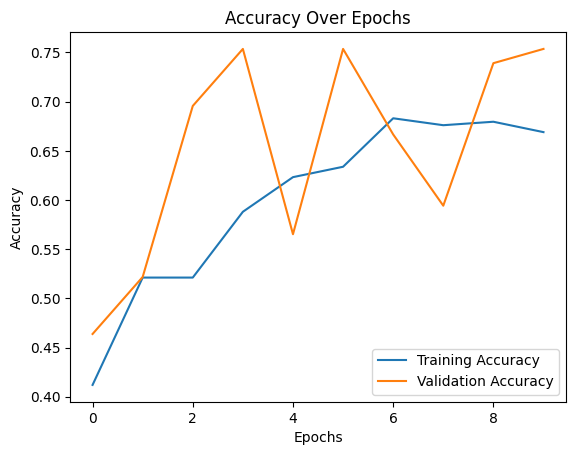

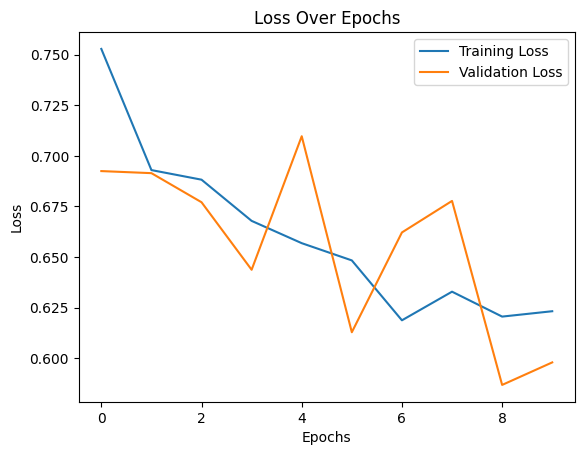

In [14]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Save the accuracy plot
plt.savefig(r"F:\Image_dataset\Dataset1\Accuracy.pdf")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# Save the loss plot
plt.savefig(r"F:\Image_dataset\Dataset1\Loss.pdf")
plt.show()


In [15]:
model.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss  = 'binary_crossentropy', # categorical_crossentropy
    metrics = ['accuracy']    
)

In [16]:
# training model
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator
)  

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 934ms/step - accuracy: 0.6587 - loss: 0.6364 - val_accuracy: 0.7536 - val_loss: 0.5767
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 914ms/step - accuracy: 0.7170 - loss: 0.5676 - val_accuracy: 0.7391 - val_loss: 0.5568
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 852ms/step - accuracy: 0.7354 - loss: 0.5527 - val_accuracy: 0.7536 - val_loss: 0.5415
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 628ms/step - accuracy: 0.6658 - loss: 0.6005 - val_accuracy: 0.7681 - val_loss: 0.5723
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 520ms/step - accuracy: 0.7096 - loss: 0.5743 - val_accuracy: 0.7536 - val_loss: 0.5900
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 655ms/step - accuracy: 0.7464 - loss: 0.5358 - val_accuracy: 0.7391 - val_loss: 0.5812
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 769ms/step - accuracy: 0.6893 - loss: 0.5686 - val_accuracy: 0.7391 - val_loss: 0.5462
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 689ms/step - accuracy: 0.7384 - loss: 0.5222 - val_accu

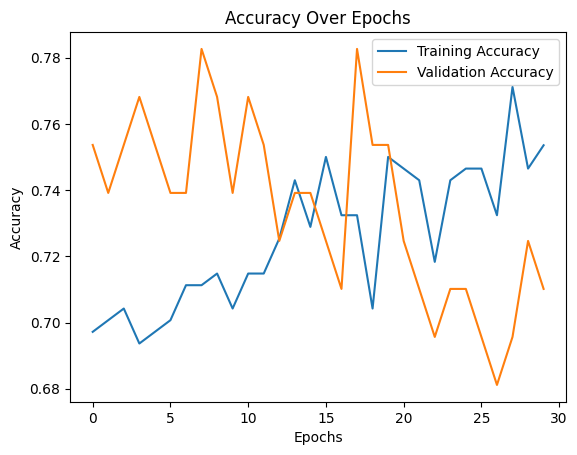

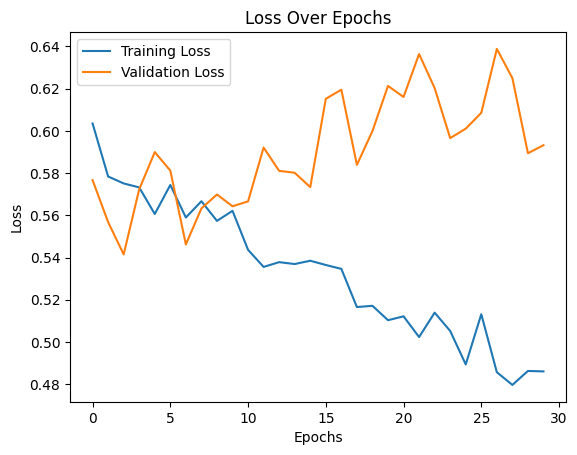

In [17]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Building the CNN model  256 filters
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu' , input_shape = (100,100,3)),
    MaxPool2D(pool_size  = (2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPool2D(pool_size  = (2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPool2D(pool_size  = (2,2)),
    Conv2D(256, (3,3), activation = 'relu'),
    MaxPool2D(pool_size  = (2,2)),
    Flatten(),
    Dense(256, activation = 'relu' ),
    Dense(1 , activation = 'sigmoid')
])

model.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss  = 'binary_crossentropy', # categorical_crossentropy
    metrics = ['accuracy']    
)

# training model
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator
)  

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
